**Data not available, this file only serves as an illustration.**

Beware, if you run the cells, you will get errors and will loose the images.
To avoid this problem, you could replace the input data names.

How did you start Notebook
--------------------------

When starting this notebook using this:
```bash
~/tutorial-env/bin/ipython notebook --pylab=inline
```
comment the code in the next cell.

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np # Numpy for general purpose processing
import SimpleITK as sitk # SimpleITK to load images
import sys
sys.path.append('../')
from core.ialm import recover # Candes et al.â€™s RPCA approach

In [42]:
# load first image
data_folder = '/home/xiaoxiao/work/data/BRATS/Challenge/aligned_to_atlas_T1'
slice_nr = 80
im_names = ['T1_0.mha',  'T1_1.mha',  'T1_2.mha',  'T1_3.mha',  'T1_4.mha',  'T1_5.mha',  'T1_6.mha',  'T1_7.mha',  'T1_8.mha',  'T1_9.mha']
num_of_data = len(im_names)
tmp = sitk.ReadImage(data_folder+'/'+im_names[0]) # image in SITK format
tmp = sitk.GetArrayFromImage(tmp) # get numpy array
z_dim, x_dim, y_dim = tmp.shape # get 3D volume shape
print tmp.shape
tmp = tmp[slice_nr,:,:] # extract our slice
tmp = tmp.reshape(-1) # vectorize

(140, 180, 158)


In [43]:
Y = np.zeros((len(tmp), len(im_names)))
for i, im_file in enumerate(im_names):
    tmp = sitk.ReadImage(data_folder+'/'+im_file)
    tmp = sitk.GetArrayFromImage(tmp)
    tmp = tmp[slice_nr,:,:]
    Y[:,i] = tmp.reshape(-1)

In [50]:
gamma = 0.4* sqrt(float(Y.shape[1])/Y.shape[0])
low_rank, sparse, n_iter,rank, sparsity = recover(Y,gamma)


[iter: 0000]: rank(P) = 0001, |C|_0 = 15596, crit=0.1490395374
[iter: 0010]: rank(P) = 0004, |C|_0 = 150433, crit=0.0033232948
[iter: 0020]: rank(P) = 0006, |C|_0 = 166152, crit=0.0000178819
[iter: 0030]: rank(P) = 0006, |C|_0 = 166937, crit=0.0000001426


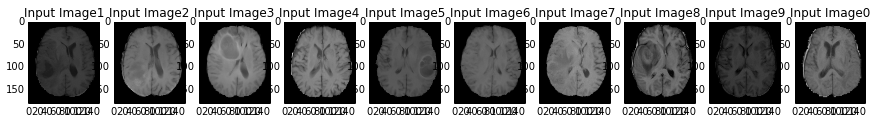

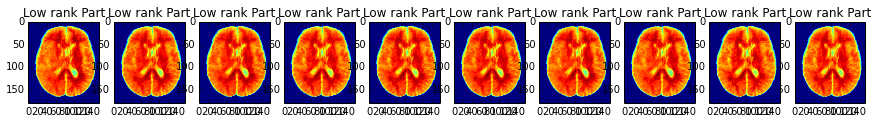

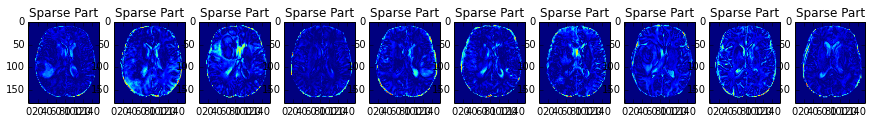

In [55]:
fig = plt.figure(figsize=(15,15))
for i in range(num_of_data):
    fig.add_subplot(1,num_of_data,i)
    implot = imshow(Y[:,i].reshape(x_dim,y_dim),cm.gray)
    plt.title('Input Image' + str(i))
    #plt.colorbar()
    implot.set_clim(0,560)
    
fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(1,num_of_data,i)
    implot =imshow(np.abs(low_rank[:,i].reshape(x_dim,y_dim)))
    plt.title('Low rank Part')
    #plt.colorbar()
    #implot.set_clim(0,560)

fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(1,num_of_data,i)
    implot = imshow(np.abs(sparse[:,i].reshape(x_dim,y_dim)))
    plt.title('Sparse Part')
    #plt.colorbar()
   # implot.set_clim(0,560)
    

In [24]:
r = np.arange(0.1,1.5,0.1)
print r
sparsity = zeros(r.size)
rank = zeros(r.size)
i = 0
for lamda in r:
    gamma = lamda * sqrt(float(Y.shape[1])/Y.shape[0])
    low_rank, sparse, n_iter,rank[i], sparsity[i] = recover(Y,gamma)
    i = i+1

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4]
[iter: 0000]: rank(P) = 0000, |C|_0 = 66609, crit=0.1465696193
[iter: 0010]: rank(P) = 0000, |C|_0 = 68044, crit=0.0000225558
[iter: 0020]: rank(P) = 0000, |C|_0 = 68078, crit=0.0000000836
[iter: 0000]: rank(P) = 0000, |C|_0 = 64547, crit=0.2877991711
[iter: 0010]: rank(P) = 0000, |C|_0 = 68012, crit=0.0000608166
[iter: 0020]: rank(P) = 0000, |C|_0 = 68077, crit=0.0000002223
[iter: 0000]: rank(P) = 0000, |C|_0 = 57001, crit=0.4171048672
[iter: 0010]: rank(P) = 0000, |C|_0 = 67990, crit=0.0000973961
[iter: 0020]: rank(P) = 0000, |C|_0 = 68076, crit=0.0000002879
[iter: 0000]: rank(P) = 0001, |C|_0 = 47035, crit=0.3993418706
[iter: 0010]: rank(P) = 0001, |C|_0 = 67985, crit=0.0004877406
[iter: 0020]: rank(P) = 0001, |C|_0 = 68530, crit=0.0000059879
[iter: 0030]: rank(P) = 0001, |C|_0 = 68523, crit=0.0000001781
[iter: 0000]: rank(P) = 0001, |C|_0 = 44860, crit=0.3008710324
[iter: 0010]: rank(P) = 0001, |C|_0 = 61180, c

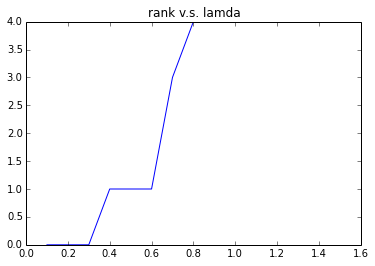

In [25]:
fig = plt.figure
plt.plot(r,rank)
plt.title('rank v.s. lamda')

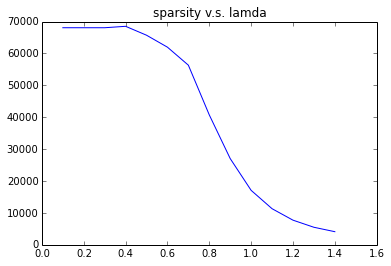

In [26]:
fig = plt.figure
plt.plot(r,sparsity)
plt.title('sparsity v.s. lamda')